<h1>Credit Scoring Model</h1>

<h3>Develop a credit scoring model to predict the creditworthiness of individuals based on historical financial data. Utilize classification algorithms and assess the model's accuracy.<h3>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-credit-scoring/bank.csv
/kaggle/input/bank-credit-scoring/scoring.jpg


In [2]:
#Importing The Required Libraries
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import plotly.express as px
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import itertools
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,f1_score,confusion_matrix, accuracy_score

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
df=pd.read_csv("/kaggle/input/bank-credit-scoring/bank.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
df.shape

(4521, 17)

# Preprocessing

In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [10]:
df['marital'].value_counts()

marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

<Axes: xlabel='marital', ylabel='count'>

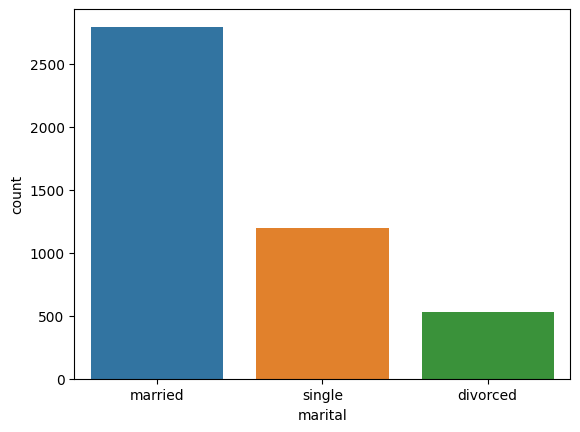

In [11]:
sns.countplot(x='marital',data=df)

<Axes: xlabel='housing', ylabel='count'>

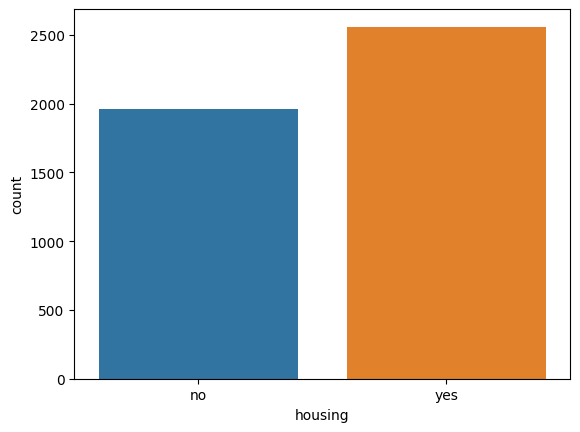

In [12]:
sns.countplot(x='housing',data=df)

In [13]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [14]:
categories_1st=["job","marital","education","default","housing","housing","loan","contact","month","poutcome","y"]
LE=LabelEncoder()
for i in categories_1st:
    df[i]=LE.fit_transform(df[i])

In [15]:
df.rename(columns={"y": "loan_approval"}, inplace=True)

In [16]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,loan_approval
age,1.000000,-0.021500,-0.381485,-0.121613,-0.017885,0.083820,-0.193888,-0.011250,0.015161,-0.017853,-0.040714,-0.002367,-0.005148,-0.008894,-0.003511,-0.009320,0.045092
job,-0.021500,1.000000,0.069390,0.170160,0.008324,0.009797,-0.128353,-0.040245,-0.074068,0.012865,-0.096613,-0.006739,-0.002739,-0.022760,0.005029,0.013049,0.027401
marital,-0.381485,0.069390,1.000000,0.102714,-0.020745,0.024971,-0.029851,-0.045210,-0.068236,0.008794,-0.035855,0.006619,0.005915,0.017050,0.038028,-0.027716,0.015042
education,-0.121613,0.170160,0.102714,1.000000,-0.010534,0.057725,-0.087070,-0.054086,-0.110554,0.014926,-0.050086,-0.014878,-0.001723,0.012077,0.023983,-0.032135,0.042987
default,-0.017885,0.008324,-0.020745,-0.010534,1.000000,-0.070886,0.006881,0.063994,0.008448,-0.013261,0.014297,-0.011615,-0.012348,-0.026317,-0.026656,0.039032,0.001303
balance,0.083820,0.009797,0.024971,0.057725,-0.070886,1.000000,-0.050227,-0.071349,-0.009665,-0.008677,0.023113,-0.015950,-0.009976,0.009437,0.026196,-0.029268,0.017905
housing,-0.193888,-0.128353,-0.029851,-0.087070,0.006881,-0.050227,1.000000,0.018451,0.196454,-0.031291,0.266630,0.015740,-0.003574,0.116893,0.038621,-0.093093,-0.104683
loan,-0.011250,-0.040245,-0.045210,-0.054086,0.063994,-0.071349,0.018451,1.000000,-0.007319,-0.004879,0.016329,-0.004997,0.017120,-0.031086,-0.022115,0.027028,-0.070517
contact,0.015161,-0.074068,-0.068236,-0.110554,0.008448,-0.009665,0.196454,-0.007319,1.000000,-0.033807,0.370077,-0.011380,0.012278,-0.243223,-0.187232,0.267173,-0.133595
day,-0.017853,0.012865,0.008794,0.014926,-0.013261,-0.008677,-0.031291,-0.004879,-0.033807,1.000000,-0.014795,-0.024629,0.160706,-0.094352,-0.059114,0.073714,-0.011244


In [17]:
x=df.iloc[:,:-1]
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1


In [18]:
y=df.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: loan_approval, Length: 4521, dtype: int64

In [19]:
print(x.shape, y.shape)

(4521, 16) (4521,)


In [20]:
print("Before oversampling:")
print(y.value_counts())
sm=RandomOverSampler()
x,y=sm.fit_resample(x,y)
print("After oversampling:")
print(y.value_counts())

Before oversampling:
loan_approval
0    4000
1     521
Name: count, dtype: int64
After oversampling:
loan_approval
0    4000
1    4000
Name: count, dtype: int64


In [21]:
#minmaxscaler
ms=MinMaxScaler()
x=ms.fit_transform(x)
x

array([[0.16176471, 0.90909091, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.20588235, 0.63636364, 0.5       , ..., 0.38990826, 0.16      ,
        0.        ],
       [0.23529412, 0.36363636, 1.        , ..., 0.37958716, 0.04      ,
        0.        ],
       ...,
       [0.27941176, 0.81818182, 1.        , ..., 0.31995413, 0.24      ,
        0.66666667],
       [0.26470588, 0.81818182, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.16176471, 0.09090909, 1.        , ..., 0.        , 0.        ,
        1.        ]])

In [22]:
#splitting to test and train data
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (7200, 16) (7200,)
Test set: (800, 16) (800,)


# Using Logistic Regression

In [23]:
LR = LogisticRegression(C=0.011, solver='liblinear').fit(X_train,y_train)
y_pred = LR.predict(X_test)

In [24]:
y_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,

In [25]:
LR_score=accuracy_score(y_test, y_pred)
LR_F1_SCORE=f1_score(y_test, y_pred, average='weighted') 
print('F1_score:%.4f'%LR_F1_SCORE)
print('Accuracy: %f' % accuracy_score(y_test, y_pred))

F1_score:0.7211
Accuracy: 0.723750


In [26]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.63      0.76      0.69       321
           1       0.81      0.70      0.75       479

    accuracy                           0.72       800
   macro avg       0.72      0.73      0.72       800
weighted avg       0.74      0.72      0.73       800



Confusion matrix, without normalization
[[245 145]
 [ 76 334]]


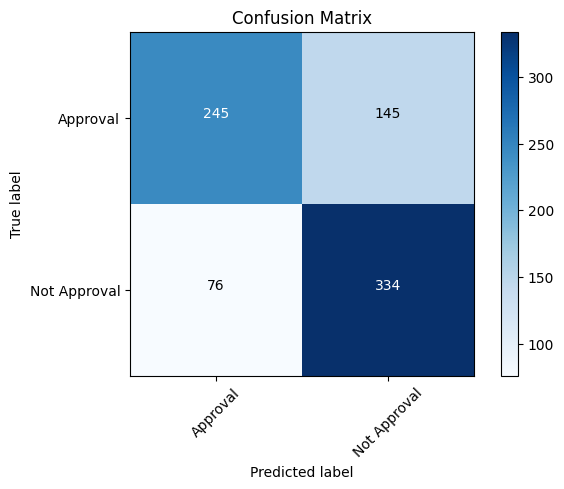

In [27]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['Approval', 'Not Approval']
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False, title='Confusion Matrix')
plt.show()

# Using SVM

In [28]:
clf = svm.SVC(C=10, gamma =1,kernel='rbf')
clf.fit(X_train, y_train) 

SVC(C=10, gamma=1)

In [29]:
y_pred = clf.predict(X_test)
y_pred 

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,

In [30]:
SVM_score=accuracy_score(y_test, y_pred)
SVM_F1_SCORE=f1_score(y_test, y_pred, average='weighted') 
print('F1_score:%.4f'%SVM_F1_SCORE)
print('Accuracy: %f' % accuracy_score(y_test, y_pred))

F1_score:0.8998
Accuracy: 0.900000


In [31]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       364
           1       0.93      0.88      0.91       436

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



Confusion matrix, without normalization
[[337  53]
 [ 27 383]]


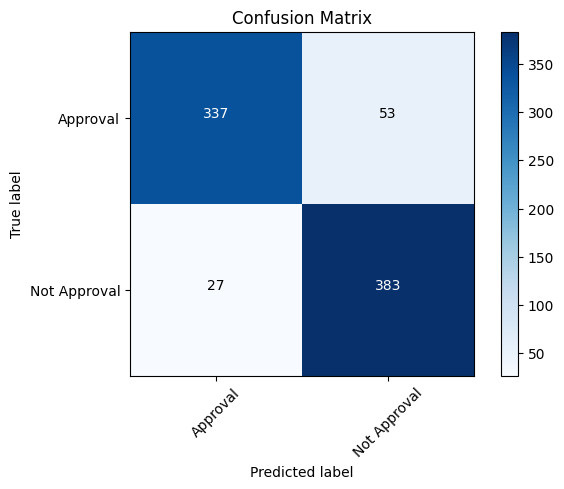

In [32]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['Approval', 'Not Approval']
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False, title='Confusion Matrix')
plt.show()

# Using KNN

In [33]:
x_train_norm = preprocessing.StandardScaler().fit(X_train).transform(X_train)
x_train_norm[0:5]

array([[ 0.60655907,  0.15438644,  1.3436979 , -1.69548663, -0.1334605 ,
         8.83606053, -1.01822154, -0.38036047,  1.79617506,  0.16593426,
         0.19506675, -0.83019212, -0.57768769, -0.48178508, -0.4173148 ,
         0.52875083],
       [-0.6605766 ,  1.40335539, -0.25040737, -0.36162477, -0.1334605 ,
        -0.53996897,  0.98210454, -0.38036047, -0.61862476,  1.63350721,
        -1.38442112, -0.76798197,  0.53206455, -0.48178508, -0.4173148 ,
         0.52875083],
       [ 0.35313194, -1.09458251, -0.25040737, -0.36162477, -0.1334605 ,
        -0.29743537,  0.98210454, -0.38036047,  1.79617506, -0.07866123,
         0.8268619 ,  2.47542914, -0.20777028, -0.48178508, -0.4173148 ,
         0.52875083],
       [-0.23819804,  1.40335539, -0.25040737,  2.30609895, -0.1334605 ,
        -0.23534967, -1.01822154, -0.38036047,  1.79617506,  1.75580496,
         0.8268619 ,  1.23688156, -0.20777028, -0.48178508, -0.4173148 ,
         0.52875083],
       [-0.40714946, -0.78234028,  1

In [34]:
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train_norm,y_train)
neigh

KNeighborsClassifier(n_neighbors=3)

In [35]:
x_test_norm = preprocessing.StandardScaler().fit(X_test).transform(X_test)
x_test_norm[0:5]

array([[ 0.14115864, -1.18187372, -1.83072242, -1.78476522, -0.14285714,
        -0.52084474,  1.04344279, -0.34931309,  1.87350368, -0.86085376,
         0.78549254, -0.81636409, -0.54843917, -0.47083179, -0.39804579,
         0.52821529],
       [-0.89964239, -0.24666207, -0.27100151,  0.97696046, -0.14285714,
         0.4910399 ,  1.04344279, -0.34931309, -0.59366166, -0.61515879,
        -0.745682  , -0.29958483,  0.48472724, -0.47083179, -0.39804579,
         0.52821529],
       [-0.72617555, -0.24666207,  1.28871941,  0.97696046, -0.14285714,
         0.70498575, -0.95836592, -0.34931309, -0.59366166,  1.59609597,
         0.17302272,  0.10522559, -0.20405037, -0.47083179, -0.39804579,
         0.52821529],
       [-0.55270871,  1.31202401, -0.27100151, -0.40390238, -0.14285714,
        -0.54025834,  1.04344279, -0.34931309, -0.59366166, -0.86085376,
         1.09172745,  0.40093816, -0.54843917,  0.41325239,  2.18666711,
        -0.46607231],
       [-0.20577504,  1.31202401, -1

In [36]:
y_pred = neigh.predict(x_test_norm)
y_pred[0:5]

array([0, 1, 1, 1, 1])

In [37]:
knn_score=accuracy_score(y_test, y_pred)
kNN_F1_SCORE=f1_score(y_test, y_pred, average='weighted') 
print('F1_score:%.4f'%kNN_F1_SCORE)
print("Test set Accuracy: ", accuracy_score(y_test, y_pred))

F1_score:0.9384
Test set Accuracy:  0.93875


In [38]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       343
           1       1.00      0.89      0.94       457

    accuracy                           0.94       800
   macro avg       0.94      0.95      0.94       800
weighted avg       0.95      0.94      0.94       800



Confusion matrix, without normalization
[[342  48]
 [  1 409]]


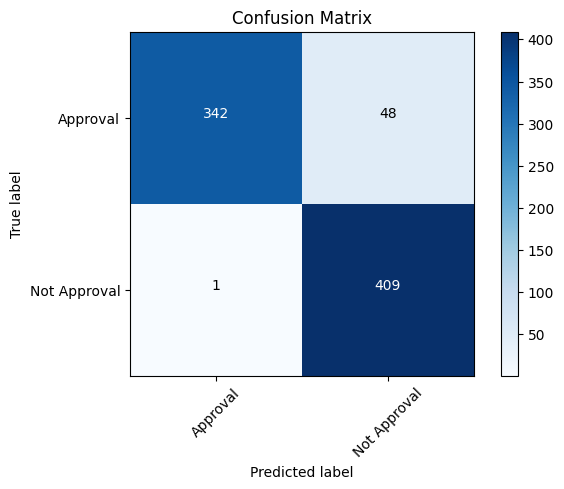

In [39]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['Approval', 'Not Approval']
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False, title='Confusion Matrix')
plt.show()

# Using Random Forest

In [40]:
forest = RandomForestClassifier(criterion='entropy',max_depth= None, min_samples_leaf= 1, min_samples_split= 4)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=4)

In [41]:
y_pred = forest.predict(X_test)

In [42]:
rand_score=accuracy_score(y_test, y_pred)
RAnd_F1_SCORE=f1_score(y_test, y_pred, average='weighted') 
print('F1_score:%.4f'%RAnd_F1_SCORE)
print('Accuracy: %f' % accuracy_score(y_test, y_pred))

F1_score:0.9812
Accuracy: 0.981250


In [43]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       375
           1       1.00      0.96      0.98       425

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



Confusion matrix, without normalization
[[375  15]
 [  0 410]]


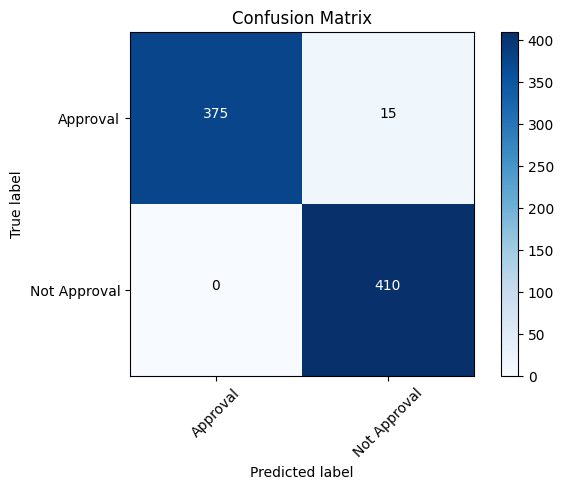

In [44]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['Approval', 'Not Approval']
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False, title='Confusion Matrix')
plt.show()

In [45]:
Accuracy=[LR_score*100,knn_score*100,SVM_score*100,round(rand_score*100)]
Algorithm=['logistic regression','SVM','KNN','Random forest']
f1_score=[LR_F1_SCORE*100,kNN_F1_SCORE*100,SVM_F1_SCORE*100,RAnd_F1_SCORE*100]
data={'Algorithm':Algorithm,'Accuracy':Accuracy,'F1_SCORE':f1_score}
Report=pd.DataFrame(data=data)
Report

,Algorithm,Accuracy,F1_SCORE
0,logistic regression,72.375,72.106608
1,SVM,93.875,93.844650
2,KNN,90.000,89.981251
3,Random forest,98.000,98.123459


# RNN Approch

<h3>LSTM:</h3>
LSTM (Long Short-Term Memory) is a type of Recurrent Neural Network (RNN). Both LSTM and traditional RNNs are neural network architectures designed for processing sequences of data. They are particularly well-suited for tasks involving sequential or time-dependent patterns, such as time series analysis, natural language processing, and speech recognition.

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Reshape data for LSTM (assuming you have a time series dataset)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model with a specified learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Adjust the learning rate as needed
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test))

# Evaluate the model
_, accuracy = model.evaluate(X_test_lstm, y_test)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

2024-07-05 09:42:48.958028: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-05 09:42:48.958176: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-05 09:42:49.118163: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/50
225/225 [==============================] - 3s 6ms/step - loss: 0.6545 - accuracy: 0.6358 - val_loss: 0.5991 - val_accuracy: 0.6988
Epoch 2/50
225/225 [==============================] - 1s 3ms/step - loss: 0.5767 - accuracy: 0.7013 - val_loss: 0.5327 - val_accuracy: 0.7588
Epoch 3/50
225/225 [==============================] - 1s 3ms/step - loss: 0.5155 - accuracy: 0.7611 - val_loss: 0.4839 - val_accuracy: 0.7925
Epoch 4/50
225/225 [==============================] - 1s 3ms/step - loss: 0.4870 - accuracy: 0.7829 - val_loss: 0.4730 - val_accuracy: 0.8037
Epoch 5/50
225/225 [==============================] - 1s 3ms/step - loss: 0.4774 - accuracy: 0.7900 - val_loss: 0.4693 - val_accuracy: 0.8037
Epoch 6/50
225/225 [==============================] - 1s 3ms/step - loss: 0.4727 - accuracy: 0.7894 - val_loss: 0.4685 - val_accuracy: 0.7975
Epoch 7/50
225/225 [==============================] - 1s 3ms/step - loss: 0.4713 - accuracy: 0.7942 - val_loss: 0.4685 - val_accuracy: 0.7975
Epoch 